# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset=pd.read_csv('excel/HRV.csv')

In [3]:
dataset.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## Dataset Preprocessing

In [4]:
dataset.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='totChol', ylabel='Count'>

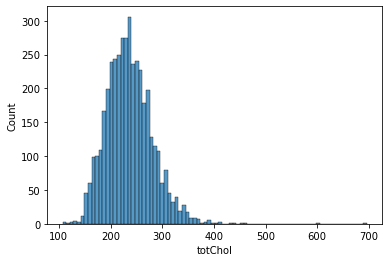

In [6]:
sns.histplot(dataset['totChol'])

In [8]:
chol_median=dataset['totChol'].median()
dataset['totChol'].fillna(chol_median, inplace= True)

In [9]:
glucose_median=dataset['glucose'].median()
dataset['glucose'].fillna(glucose_median, inplace= True)

In [11]:
BMI_median=dataset['BMI'].median()
dataset['BMI'].fillna(BMI_median, inplace= True)

In [12]:
heart_median=dataset['heartRate'].median()
dataset['heartRate'].fillna(heart_median, inplace= True)

In [13]:
dataset.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

### Create independent and dependent variables to predict 

In [14]:
dataset.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [15]:
X=dataset[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]
y=dataset[['TenYearCHD']]

## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=.15, random_state=0)

## Training the Logistic Regression model 

In [17]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train.values,y_train.values.ravel())

C:\Users\toddp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predicting a new result
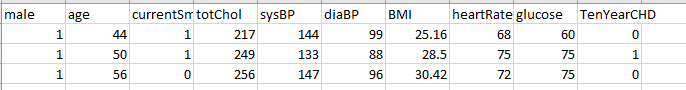

In [18]:
X_test.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose'],
      dtype='object')

In [20]:
print(classifier.predict([[1,44,1,217,144,99,25.16,68,60]]))

[0]


In [22]:
print(classifier.predict([[1,56,0,256,147,96,30.42,72,75]]))

[0]


### Confusion matrix, Confusion matrix display and classification report

In [27]:
y_pred=classifier.predict(X_test.values)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[538   2]
 [ 93   3]]


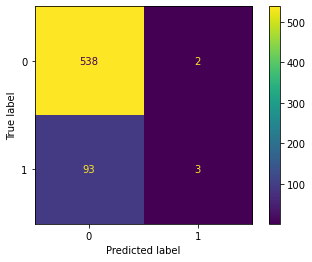

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
display=ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
display.plot()
plt.show()

### Discuss the results

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       540
           1       0.60      0.03      0.06        96

    accuracy                           0.85       636
   macro avg       0.73      0.51      0.49       636
weighted avg       0.81      0.85      0.79       636



### We have an 85 percent accuracy confusion matrix. We have 538 true negative, 93 false negative, 3 true positive, and 2 false positive. 

## Summary

### Imported the dataset, removed missing values from dataset, split dataset in training and testing, predicted results, and displayed the confusion matrix.
